Alex Beckwith - Math 857 - HW 4

painless-conjugate-gradient.pdf

1. Recreate an image similar to Figure 8 in the above PDF (note definition of f(x) on page 8) using steepest descent with line minimization. You may use algorithm B1 in the appendix if you wish. Turn in all your code and the image.

In [292]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import matmul,array

In [293]:
#Given
A = array([[3.,2.],[2.,6.]])
b = array([[2.],[-8.]])
c = 0

def f(x,A=A,b=b,c=c):
    a = matmul(x.T,A)
    a = (1/2)*matmul(a,x)
    b = matmul(b.T,x)
    return a - b + c

x0 = array([[-2],[-2]])
x_sol = array([[2],[-2]])

In [294]:
#Steepest Descent
def steep(A=A,b=b,x=x0,i=0,i_max=100,e_max=1e-12):
    x_list = [x]
    r = b - matmul(A,x)
    delta = matmul(r.T,r)[0][0]
    delta0 = delta
    while ((i<i_max) and (delta>((e_max**2)*delta0))):
        q = matmul(A,r)
        alpha = delta/matmul(r.T,q)
        alpha=alpha[0][0]

        x = x + alpha*r
        x_list.append(x)

        if i%50==0:
            r = b - matmul(A,x)
        else:
            r = r - alpha*q
        
        delta = matmul(r.T,r)[0][0]
        i += 1
    return x_list
p1 = steep()
p1_sol = {
    "End Point":p1[-1],
    "nIterations":len(p1)-1
}
print(p1_sol)

{'End Point': array([[ 2.],
       [-2.]]), 'nIterations': 40}


In [296]:
#Creating Euclidean Space 4 Plotting
subdivs = 50
x1 = np.linspace(-4,6,subdivs)
x2 = np.linspace(-6,4,subdivs)
X1,X2 = np.meshgrid(x1,x2)
y = []
for z1 in x1:
    row = []
    for z2 in x2:
        z = array([[z1],[z2]])
        row.append(f(z))
    y.append(row)
y = array(y).reshape(subdivs,subdivs).T

Text(0, 0.5, 'x2')

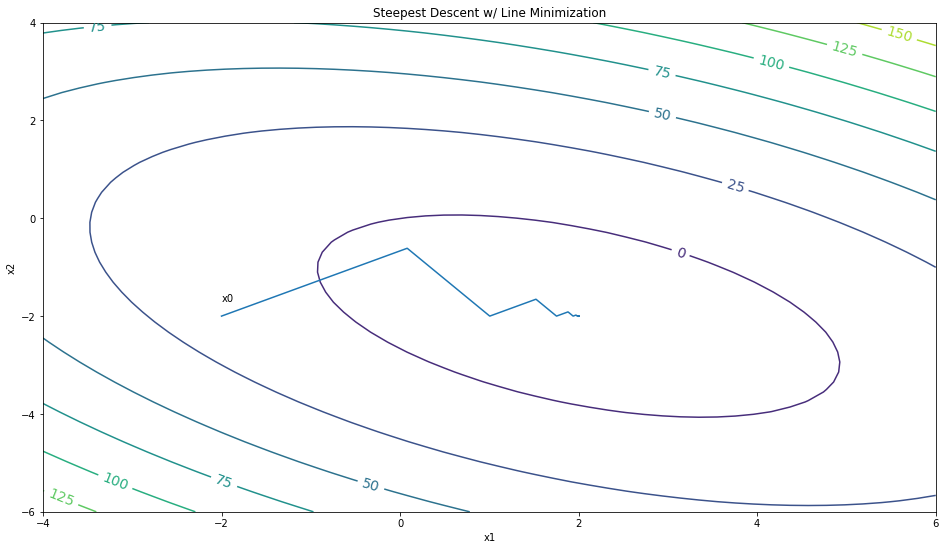

In [297]:
#Steepest Descent w/ Line Minimization Chart

sd = steep()
sd_x = [sd[i][0][0] for i in range(len(sd))]
sd_y = [sd[i][1][0] for i in range(len(sd))]

fig,ax = plt.subplots(figsize=(16,9))
con = ax.contour(X1,X2,y)
ax.clabel(con, inline=True, fontsize=14)

lin = ax.plot(sd_x,sd_y)
text = ax.text(sd_x[0],sd_y[0]+.3,"x0")

#Attributes
ax.set_title("Steepest Descent w/ Line Minimization")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

2. Recreate an image similar to Figure 30 in the above PDF (note definition of f(x) on page 8) using steepest descent with line minimization. You should use algorithm B2 in the appendix. Turn in all your code and the image.

In [298]:
#Conjugated Gradients
def congrad(A=A,b=b,x=x0,i=0,i_max=50,e_max=1e-8):
    x_list = [x]
    
    r = b - matmul(A,x)
    d = r
    delta_new = matmul(r.T,r)[0][0]
    delta0 = delta_new

    while ((i<i_max) and (delta_new>((e_max**2)*delta0))):
        q = matmul(A,d)
        alpha = delta_new/matmul(d.T,q)
        alpha=alpha[0][0]

        x = x + alpha*d
        x_list.append(x)

        if i%50==0:
            r = b - matmul(A,x)
        else:
            r = r - alpha*q

        delta_old = delta_new
        delta_new = matmul(r.T,r)[0][0]
        beta = delta_new/delta_old
        d = r + beta*d
        i += 1
    return x_list
p2 = congrad()
p2_sol = {
    "End Point":p2[-1],
    "nIterations":len(p2)-1
}
print(p2_sol)

{'End Point': array([[ 2.],
       [-2.]]), 'nIterations': 2}


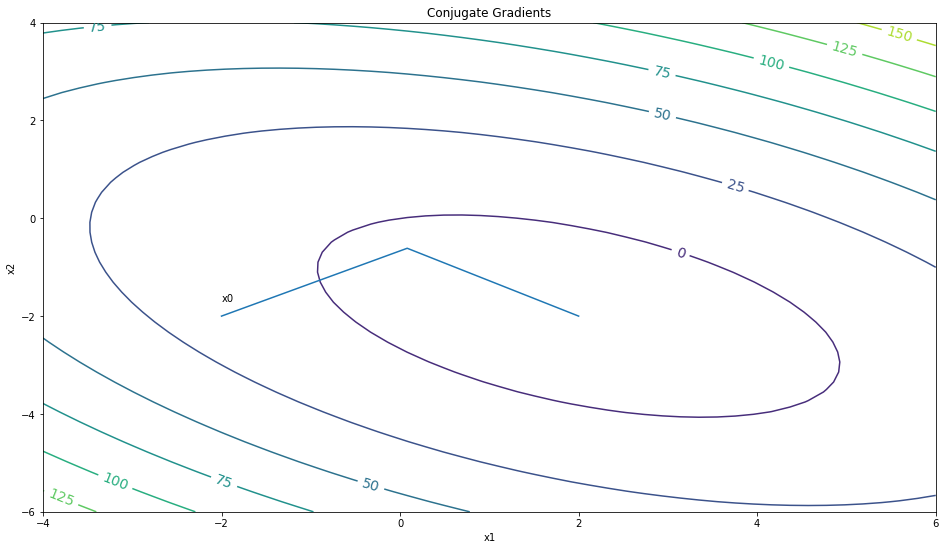

In [299]:
#Conjugate Gradients Chart
def chart_congrad(sd=congrad()):
    sd_x = [sd[i][0][0] for i in range(len(sd))]
    sd_y = [sd[i][1][0] for i in range(len(sd))]

    fig,ax = plt.subplots(figsize=(16,9))
    con = ax.contour(X1,X2,y)
    ax.clabel(con, inline=True, fontsize=14)

    lin = ax.plot(sd_x,sd_y)
    text = ax.text((sd_x[0]),sd_y[0]+.3,"x0")

    #Attributes
    ax.set_title("Conjugate Gradients")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
chart_congrad()

3. Let Q=[3,1,0;1,2,-1;0,-1,2], and d1=[1;1;1], d2=[1;2;3], and d3=[1;2;4]. Calculate d2hat and d3hat so that d1, d2hat, and d3hat are Q-conjugate directions. (While this could be done by hand, it will get messy, I suggest writing a short code to do the calculation). See the 2/23/2022 lecture.

In [301]:
Q = array([[3,1,0],[1,2,-1],[0,-1,2]])
d1 = array([[1],[1],[1]])
d2 = array([[1],[2],[3]])
d3 = array([[1],[2],[4]])
ds = [d1,d2,d3]

#Small function to simplify Q matrix multiplication
def calc_qprod(da,db,Q=Q):
    a = matmul(da,Q)
    return matmul(a,db)[0][0]

#Builds off of calc_qprod to return direction orthogonal to first input
def calc_hat(da,db):
    num = calc_qprod(da.T,db)
    den = calc_qprod(da.T,da)
    alpha = num/den
    return db - (alpha*da)

#Tests Q conjugacy using an error threshold just above hardware limitations
def test_qconj(di ,dj,Q=Q,e=1e-12):
    s1 = matmul(dj.T,Q)
    s2 = matmul(s1,di)
    if s2 < e:
        return True
    else:
        print(s2)

#Takes list of directions and returns list of hatted directions above list_index[0]
def exe(ds=ds,hats=[]):
    steps = len(ds)-1

    for k in range(steps):
        if k==0:
            last_d = ds[k]
        else:
            last_d = hats[-1]

        next_hat = calc_hat(last_d,ds[k+1])
        assert test_qconj(last_d,next_hat)
        hats.append(next_hat)
    return hats

hats = exe()
print(hats)

[array([[-0.57142857],
       [ 0.42857143],
       [ 1.42857143]]), array([[1.94505495],
       [1.29120879],
       [1.63736264]])]


4. Use your code from problem 2 to find the minimum value of f(x)=x'Qx-[1;2;3]'x and the corresponding x, where Q is as defined in Problem 3. Start with x0=[0;0;0] and turn in each iteration for x. 

In [302]:
#Definitions
Q = array([[3,1,0],[1,2,-1],[0,-1,2]])
b = array([[1],[2],[3]])
x0 = array([[0],[0],[0]])

#Functional abstraction allowed for reuse of algorithm
p4 = congrad(A=Q,b=b,x=x0)
p4_sol = {
    "End Point":p4[-1],
    "nIterations":len(p4)-1
}
print(p4_sol)

{'End Point': array([[-0.57142857],
       [ 2.71428571],
       [ 2.85714286]]), 'nIterations': 3}
